## Portfolio: US Counties Poverty Rate - Exploratory Data Analysis ##
This is data science portfolio based on real dataset to predict poverty rate across the United States at the country level using socio-economic indicators. The dataset was compiled from wide range of sources and publicly made available by United States Department of Agriculture Economic Research Service (USDA ERS). It can be found here https://datasciencecapstone.org/competitions/3/county-poverty/page/10/.

**Problem Statement:** 
In US, being poverty is defined as having an income below a federally defined poverty threshold. This represents US federal government's estimation of how many families are below in which their income levels do not meet any basic needs (i.e., food, shelter, clothing and other essential goods). Thus, our goal is to make predictions on poverty rates by counties within US in order to make recommendations for federal government agencies. This will help them to initiate and implement policies/support the families below officially defined poverty thresholds.

The US poverty rate dataset contains 33 features in total. There are 30 numerical and 3 categorical features to predict one target variable (i.e., poverty_rate). There are 4 different kinds of information are available from this dataset which includes county's urbanization degree (development level), economic indicators, health indicators and demographic indicators. 

**Stakeholders:** 
US federal policymakers, counties' representatives and other Not-For-Profit (NFP) organizations.

## Part A. Import Cleaned Dataset ##

In [1]:
# Import all libraries #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Authorization #
__author__ = "Taesun Yoo"
__email__ = "yoots1988@gmail.com"

In [2]:
#################################
# Part 2 - Discover the Problem #
#################################
# Write a group of funtions:
def load_file(file):
    '''load input CSVs as a dataframe '''
    return pd.read_csv(file)

def clean_data(raw_df):
    '''remove rows that contain invalid data or duplicate IDs'''
    clean_df = raw_df.drop_duplicates(subset='row_id')
    return clean_df

def EDA_missing_data(cleaned_df):
    '''Performs missing % on each column '''
    missing_df = cleaned_df.isnull().sum()
    missing_df = pd.DataFrame(missing_df, columns=['count'])
    missing_df['pct'] = missing_df['count']/len(cleaned_df)
    missing_df = missing_df.sort_values(by='pct', ascending=False)
    return missing_df

def EDA_numerical_data(cleaned_df):
    '''Computes summary statistics on numerical data'''
    summary_df_num = cleaned_df.describe(include='all').T
    summary_df_num = pd.DataFrame(summary_df_num)[['count', 'std', 'min', 'mean', 'max', '25%', '50%', '75%']]
    return summary_df_num

def EDA_categorical_data(cleaned_df):
    '''Computes summary statitics on categorical data'''
    summary_df_cat = cleaned_df.describe(include=['O'])
    summary_df_cat = pd.DataFrame(summary_df_cat)
    return summary_df_cat
    
def EDA_pivot_table(cleaned_df, cat_var, num_var):
    '''Creates a pivot table based on categorical var and average numerical var'''
    pivot_cat_df = cleaned_df.pivot_table(index=cat_var, values=num_var, aggfunc=np.mean)
    pivot_cat_df.reset_index(level=0, inplace=True)
    pivot_cat_df.rename(columns={cat_var:cat_var, num_var:"avg" + "_" + num_var + "_" + cat_var}, inplace=True)
    return pivot_cat_df
    
def EDA_plot_hist_label(df, cat_var, bins, lab_list):
    '''split dataframe by category and plot a histogram'''
    for i in lab_list:
        df_by_label = df['poverty_rate'][df[cat_var] == i]
        plt.hist(df_by_label, bins=bins, label=i)
        plt.title('Histogram of Poverty Rate')
        plt.xlabel('Poverty Rate')
        plt.ylabel('# of US counties')                   

def EDA_plot_hist_2by2(df, 
                       var1, bin1, lab1, 
                       var2, bin2, lab2, 
                       var3, bin3, lab3,
                       var4, bin4, lab4, 
                       factor=None):
    '''Print skewness and plot the histogram'''
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(hspace=1/2, wspace=1/2)
    #subplot 1:
    print("Skewness is:" + lab1, df[var1].skew())
    plt.subplot(2,2,1)
    plt.hist(df[var1]*factor, color='green', bins=bin1)
    plt.title('Histogram of '+ lab1)
    plt.xlabel(lab1)
    plt.ylabel('# of US counties')
    #subplot 2:
    print("Skewness is:" + lab2, df[var2].skew())
    plt.subplot(2,2,2)
    plt.hist(df[var2]*factor, color='blue', bins=bin2)
    plt.title('Histogram of '+ lab2)
    plt.xlabel(lab2)
    plt.ylabel('# of US counties')
    #subplot 3:
    print("Skewness is:" + lab3, df[var3].skew())
    plt.subplot(2,2,3)
    plt.hist(df[var3]*factor, color='cyan', bins=bin3)
    plt.title('Histogram of '+ lab3)
    plt.xlabel(lab3)
    plt.ylabel('# of US counties')
    #subplot 4:
    print("Skewness is:" + lab4, df[var4].skew())
    plt.subplot(2,2,4)
    plt.hist(df[var4]*factor, color='purple', bins=bin4)
    plt.title('Histogram of '+ lab4)
    plt.xlabel(lab4)
    plt.ylabel('# of US counties')
    
def EDA_plot_freq_chart(df, cat_var, var_name):
    '''computes frequency count chart'''
    cat_var_count = df[cat_var].value_counts()
    sns.barplot(cat_var_count.index, cat_var_count.values, alpha=0.9)
    plt.title('Frequency Counts of '+ var_name)
    plt.ylabel('Counts')
    plt.xlabel(var_name, fontsize=10)
    plt.xticks(rotation=270)
    plt.show()

def EDA_plot_bar(cleaned_df, cat_var, num_var, color):
    '''Plots the bar chart'''
    cleaned_df.plot.bar(color=color)
    plt.xlabel(cat_var)
    plt.ylabel('Avg. ' + num_var)
    plt.xticks(rotation=0)
    plt.show()    

def EDA_plot_box_whisker(df, num_var, cat_var, hue=None):
    '''plot the box-whisker plot'''
    df.sort_values(by=[num_var, cat_var], ascending=False, inplace=True)
    plt.figure()
    sns.set(style='whitegrid')
    sns.boxplot(cat_var, num_var, hue, df)
    plt.title('Box Plot of '+ num_var + ' by '+ cat_var)
    plt.xticks(rotation=270, fontsize=9)

def EDA_convert_object_to_cat(df):
    '''convert data type object to category'''
    for col in df.columns:
        if df[col].dtype.name == "object":
            df[col] = df[col].astype('category')

def EDA_encode_cat_var(df, col):
    '''encode the categorical variables using avg. salary for each category '''
    cat_dict={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['poverty_rate'].mean()
    df[col] = df[col].map(cat_dict)

def EDA_plot_corr_matrix(df, features, label):
    '''plot the correlation matrix'''
    corr = df[features + label].corr()
    # Create a mask:
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(12,10))
    sns.heatmap(corr,
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                annot=True, fmt=".2f", mask=mask)
    plt.xticks(rotation=90)
    plt.show()

def EDA_plot_crosstab(df, cat_var1, cat_var2):
    '''plot a cross-tabulate on two categorical variables'''
    cross_tab = pd.crosstab(df[cat_var1], df[cat_var2])
    return cross_tab

def EDA_plot_scatter(df, 
                     var1, lab1, c1,
                     var2, lab2, c2, 
                     factor=None):
    '''plot 2 by 1 scatter plots'''
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(hspace=0.4, wspace=0.9)
    plt.subplot(2,1,1)
    plt.scatter(df[var1]*factor, df['poverty_rate'], color=c1)
    plt.title('Relationship between ' + lab1 + ' and Poverty Rate')
    plt.xlabel(lab1)
    plt.ylabel('Poverty Rate')

    plt.subplot(2,1,2)
    plt.scatter(df[var2]*factor, df['poverty_rate'], color=c2)
    plt.title('Relationship between '+ lab2 + ' and Poverty Rate')
    plt.xlabel(lab2)
    plt.ylabel('Poverty Rate')
    
def convert_data_type_category(df, var_name):
    df_eda[var_name] = df_eda[var_name].astype('str')
    return df_eda[var_name]
    
def split_dataframe_by_string(df, cat_var, str_val):
    '''split dataframe by a specified string value in categorical variable'''
    df_str = df[df[cat_var].str.contains(str_val, case=True, regex=False)]
    return df_str

def EDA_plot_multi_facet_scatter(df1, df2, 
                                 var1, lab1, 
                                 var2, lab2,
                                 response, factor):
    '''plot multi-faceted scatter plot by county class'''
    f, (ax1, ax2)=plt.subplots(1, 2, sharey=True, figsize=(8,4))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)
    ax1.scatter(df1[var1]*factor, df1[response], label='Nonmetro', edgecolor='w')
    ax1.scatter(df2[var1]*factor, df2[response], label='Metro', edgecolor='w')
    ax1.legend(loc='upper right')
    ax1.set_xlabel(lab1, fontsize=10)
    ax1.set_ylabel(response, fontsize=10)
    ax1.grid(False)
    
    ax2.scatter(df1[var2]*factor, df1[response], label='Nonmetro', edgecolor='w')
    ax2.scatter(df2[var2]*factor, df2[response], label='Metro', edgecolor='w')
    ax2.legend(loc='upper right')
    ax2.set_xlabel(lab2, fontsize=10)
    ax2.set_ylabel(response, fontsize=10)
    ax2.grid(False)

def EDA_plot_color_sc_scatter(df, var1, lab1,
                              var2, lab2,
                              var3, lab3, response):
    '''plot color scaled scatter plots'''
    # figure 1: subplot 1
    f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
    s1 = ax1.scatter(df[var1], df[var3], c=df[response],
                     cmap=plt.cm.coolwarm, edgecolor='w')
    ax1.set_xlabel(lab1, fontsize=14)
    ax1.set_ylabel(lab3, fontsize=14)
    ax1.grid(False)
    # figure 2: subplot 2    
    ax2.scatter(df[var2], df[var3], c=df[response],
                     cmap=plt.cm.coolwarm, edgecolor='w')
    ax2.set_xlabel(lab2, fontsize=14)
    ax2.set_ylabel(lab3, fontsize=14)
    ax2.grid(False)
    # lenged: color bar scaled by confounding factor
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax=plt.axes([0.85, 0.1, 0.05, 0.8])
    cb=f.colorbar(s1, cax=cax)
    cb.set_label(response)
    
#def join_data(df1, df2, key=None, left_index=False, right_index=False):
#    '''performs inner join to return records exist in both dataframes'''
#    return pd.merge(df1, df2, how='inner', on=key, left_index=left_index, right_index=right_index)

#def drop_row_by_index(df, idx_list):
#    df_row_drop = df.drop(df.index[idx_list])
#    return df_row_drop

#def drop_column_by_index(df, col_list):
#    df_column_drop = df.drop([col_list], axis=1)
#    return df_column_drop

In [3]:
# --- 3. Load the data --- #
# Define input CSVs:
if __name__ == '__main__':
    eda_file = 'df_eda.csv'

# Define type of variables list:
#df_train.select_dtypes(include='object').columns
cat_vars = ['area__rucc', 'area__urban_influence', 'econ__economic_typology', 'yr']

#df_train.select_dtypes(include='int64').columns
#df_train.select_dtypes(include='float64').columns
# 'row_id', 'health__homicides_per_100k'
num_vars = ['demo__birth_rate_per_1k', 'demo__death_rate_per_1k',
                  'econ__pct_civilian_labor', 'econ__pct_unemployment', 'econ__pct_uninsured_adults', 'econ__pct_uninsured_children',
                  'demo__pct_female', 'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic',
                  'demo__pct_non_hispanic_african_american', 'demo__pct_non_hispanic_white',
                  'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian', 'demo__pct_adults_less_than_a_high_school_diploma',
                  'demo__pct_adults_with_high_school_diploma', 'demo__pct_adults_with_some_college',
                  'demo__pct_adults_bachelors_or_higher', 'health__pct_adult_obesity', 'health__pct_adult_smoking', 'health__pct_diabetes',
                  'health__pct_low_birthweight', 'health__pct_excessive_drinking', 'health__pct_physical_inacticity',
                  'health__air_pollution_particulate_matter', 
                  'health__motor_vehicle_crash_deaths_per_100k', 'health__pop_per_dentist', 'health__pop_per_primary_care_physician']

label_var = 'poverty_rate'

# Define variables to drop
list_vars = ['row_id']

# Load data
df_eda = load_file(eda_file)

del (eda_file)

# Metadata of dataframe: EDA
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 33 columns):
area__rucc                                          3192 non-null object
area__urban_influence                               3192 non-null object
econ__economic_typology                             3192 non-null object
econ__pct_civilian_labor                            3192 non-null float64
econ__pct_unemployment                              3192 non-null float64
econ__pct_uninsured_adults                          3192 non-null float64
econ__pct_uninsured_children                        3192 non-null float64
demo__pct_female                                    3192 non-null float64
demo__pct_below_18_years_of_age                     3192 non-null float64
demo__pct_aged_65_years_and_older                   3192 non-null float64
demo__pct_hispanic                                  3192 non-null float64
demo__pct_non_hispanic_african_american             3192 non-null float64
demo__pc

## Part B. Exploratory Data Analysis ##

#### US poverty rate by counties: training set ###
Data exploration is conducted on a cleaned training set. The main goal of this phase is to explore any interesting relationships among features and identify which features are good predictors on poverty rate predictions.

Following set of questions are asked:
1. Can I count something interesting?
2. Can I find some trends (increase or decrease and any anomalies)?
3. Can I plot a bar chart or a histogram?
4. Can I make a scatter plot?

These set of guiding questions will help us to explore any insights and tell a compelling story about the US poverty dataset.

In [4]:
# compute top 10 rows on a eda_dataframe:
df_eda.head(10)
    
# check duplicates:
df_eda.duplicated().sum()

#---- Compute % of Missing Data ----#
missing_df = EDA_missing_data(df_eda)
missing_df

,count,pct
area__rucc,0,0.0
demo__pct_adults_with_some_college,0,0.0
yr,0,0.0
health__pop_per_primary_care_physician,0,0.0
health__pop_per_dentist,0,0.0
health__motor_vehicle_crash_deaths_per_100k,0,0.0
health__air_pollution_particulate_matter,0,0.0
health__pct_physical_inacticity,0,0.0
health__pct_excessive_drinking,0,0.0
health__pct_low_birthweight,0,0.0


In [5]:
#---- Compute Summary Statistics: numerical data ----#
summary_df_num = EDA_numerical_data(df_eda[num_vars])
summary_df_num

,count,std,min,mean,max,25%,50%,75%
demo__birth_rate_per_1k,3192.0,2.741186,4.000000,11.679198,29.000000,10.000000,11.000000,13.000000
demo__death_rate_per_1k,3192.0,2.785057,0.000000,10.307018,27.000000,8.000000,10.000000,12.000000
econ__pct_civilian_labor,3192.0,0.074544,0.217000,0.466937,1.000000,0.419000,0.467000,0.513000
econ__pct_unemployment,3192.0,0.022857,0.008000,0.059644,0.240000,0.044000,0.057000,0.071000
econ__pct_uninsured_adults,3192.0,0.067220,0.046000,0.217753,0.495000,0.167000,0.216000,0.262000
econ__pct_uninsured_children,3192.0,0.039977,0.009000,0.086007,0.285000,0.057000,0.077000,0.105000
demo__pct_female,3192.0,0.024264,0.294000,0.498768,0.576000,0.493000,0.503000,0.512000
demo__pct_below_18_years_of_age,3192.0,0.034284,0.098000,0.227737,0.417000,0.206750,0.226000,0.245000
demo__pct_aged_65_years_and_older,3192.0,0.043589,0.043000,0.170197,0.355000,0.142000,0.167000,0.194000
demo__pct_hispanic,3192.0,0.142777,0.000000,0.090309,0.945000,0.019000,0.035000,0.088000


In [6]:
#---- Compute Summary Statistics: categorical data ----#
summary_df_cat = EDA_categorical_data(df_eda)
summary_df_cat

,area__rucc,area__urban_influence,econ__economic_typology,yr
count,3192,3192,3192,3192
unique,6,11,6,2
top,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,year 1
freq,1026,899,1262,1597


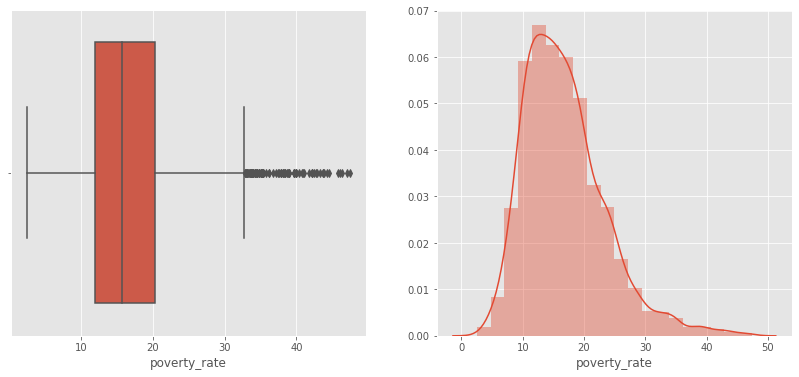

In [7]:
#---- Visualize response variable ----#
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(df_eda.poverty_rate)
plt.subplot(1,2,2)
sns.distplot(df_eda.poverty_rate, bins=20)
plt.show()

### Summary: Poverty Rate ###
Visualize the response variable - poverty rate. First, the box plot shows that mean of poverty rate is somewhere around 15. With a lot of outliers outsides of the UB approx. 32. Second, the histogram shows the distribution of poverty rate is quite close to normal distribution. It seems a little bit right skewed (positive direction).

In [8]:
#--- Use IQR to detect potential outliers ----#
stat = df_eda.poverty_rate.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
UB = stat['75%'] + 1.5*IQR
LB = stat['25%'] - 1.5*IQR
print('The LB and UB for suspected poverty rate outliers are {} and {}.'.format(LB, UB))

# Check LB Outliers:
df_eda[df_eda.poverty_rate < 0]

# Check UB Outliers:
df_eda[df_eda.poverty_rate > 32.75]

# check potential outliers by categorical vars:
df_eda.loc[df_eda.poverty_rate > 32.75, 'area__urban_influence'].value_counts()
df_eda.loc[df_eda.poverty_rate > 32.75, 'econ__economic_typology'].value_counts()

#--- Check the suspicious outliers by an economic typology: mining-dependent
df_eda[(df_eda.poverty_rate > 32.75) & (df_eda.econ__economic_typology == 'Mining-dependent')]

count    3192.000000
mean       16.836247
std         6.689073
min         2.500000
25%        12.000000
50%        15.800000
75%        20.300000
max        47.400000
Name: poverty_rate, dtype: float64
The LB and UB for suspected poverty rate outliers are -0.45000000000000107 and 32.75.


,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
13,"Nonmetro - Completely rural or less than 2,500...",Noncore not adjacent to a metro/micro area and...,Mining-dependent,0.259,0.095,0.209,0.067,0.447,0.210,0.130,...,0.120,0.156,0.133000,0.360,13.0,31.79,6320.0,3180.0,year 1,38.8
927,"Nonmetro - Completely rural or less than 2,500...",Noncore not adjacent to a metro/micro area and...,Mining-dependent,0.267,0.096,0.199,0.059,0.453,0.205,0.127,...,0.122,0.150,0.133000,0.373,13.0,24.97,7200.0,4250.0,year 2,40.8
1848,"Nonmetro - Completely rural or less than 2,500...",Noncore not adjacent to a metro/micro area and...,Mining-dependent,0.314,0.107,0.209,0.074,0.504,0.221,0.148,...,0.155,0.108,0.108000,0.381,13.0,40.11,2799.0,2320.0,year 2,33.6
2462,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.274,0.129,0.262,0.043,0.510,0.198,0.176,...,0.165,0.132,0.109000,0.403,13.0,33.00,3470.0,2359.0,year 1,34.2
2755,"Nonmetro - Completely rural or less than 2,500...",Noncore not adjacent to a metro/micro area and...,Mining-dependent,0.310,0.089,0.210,0.065,0.491,0.196,0.152,...,0.133,0.105,0.095000,0.392,13.0,37.13,2660.0,2679.0,year 1,33.9
2800,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan not adjacent to a metro area,Mining-dependent,0.319,0.080,0.232,0.052,0.509,0.207,0.168,...,0.142,0.100,0.164696,0.304,13.0,20.41,2319.0,1869.0,year 1,43.7
2923,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.286,0.139,0.270,0.045,0.505,0.189,0.166,...,0.167,0.119,0.096000,0.428,13.0,28.23,3630.0,2409.0,year 2,35.2
2967,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan not adjacent to a metro area,Mining-dependent,0.334,0.093,0.235,0.050,0.513,0.214,0.158,...,0.152,0.098,0.164696,0.308,13.0,30.64,2240.0,1789.0,year 2,33.7


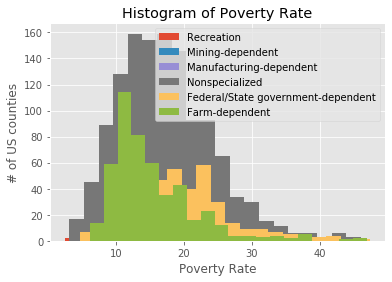

In [9]:
#---- Plot histograms ----#
# Create a list of economic typology:
lab_list = list(df_eda['econ__economic_typology'].unique())

# Plot multiple histograms on poverty rate by economic type:
EDA_plot_hist_label(df_eda, 'econ__economic_typology', 20, lab_list)
plt.legend()
plt.show()

### Histogram of Poverty Rate by Different Types of Economic Typology ###
Histogram shows that there is quite a lot of overlap between different economic typologies in lower bound area of poverty rate. In comparision, less overlap of poverty rates are prominent between different economic typologies.

Skewness is:% Civilian labor 0.6654840800131796
Skewness is:% Unemployment rate 1.281449858702936
Skewness is:% Uninsured children 1.1841675262126934
Skewness is:% Uninsured adults 0.3611808334723908


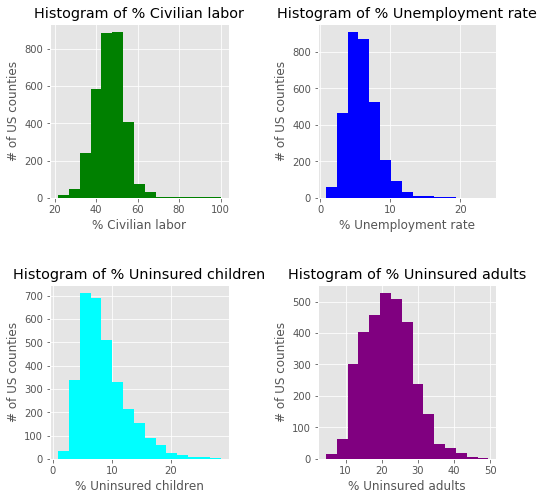

In [10]:
# Plot 2by2 histogram as a subplot: demographic
EDA_plot_hist_2by2(df_eda, 
              'econ__pct_civilian_labor', 15, '% Civilian labor',
              'econ__pct_unemployment', 15, '% Unemployment rate',
              'econ__pct_uninsured_children', 15, '% Uninsured children',
              'econ__pct_uninsured_adults', 15, '% Uninsured adults', 100)
plt.show()

### Summary: Economic Indicators ###
1. Labor: showed distribution is not quite normal. Majority of US counties have civilian labor more than 50%.
2. Unemployment rate: showed distribution skewed to right. Majority of US counties have unemployment rate at 5%.
3. Uninsured children: showed distribution skewed to right. Majority of US counties have uninsured children less than 10%.
4. Uninsured adults: showed distribution closer to normal. Majority of US counties have uninsured adults more than 20%.

Skewness is:% Adult obesity -0.28175977052680207
Skewness is:% Adult smokng 0.6708242487143588
Skewness is:% Diabetes 0.16335857983437757
Skewness is:% Excessive Drinking 1.0312779568195414


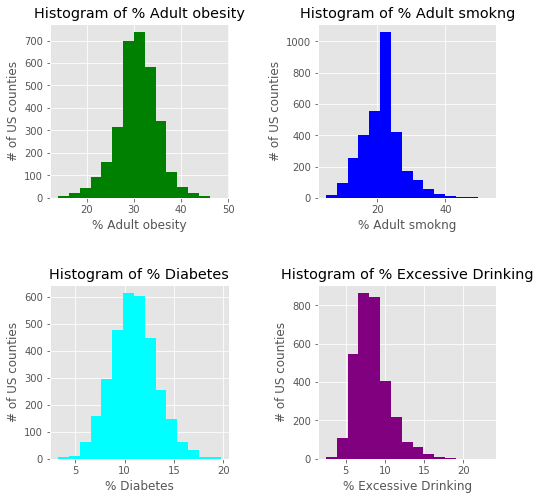

In [11]:
# Plot 2by2 histogram as a subplot: health indicators
EDA_plot_hist_2by2(df_eda, 
              'health__pct_adult_obesity', 15, '% Adult obesity',
              'health__pct_adult_smoking', 15, '% Adult smokng',
              'health__pct_diabetes', 15, '% Diabetes',
              'health__pct_low_birthweight', 15, '% Excessive Drinking', 100)
plt.show()

### Summary: Health Indicators ###
1. Obesity: showed distribution closes to normal. Majority of US counties have adult obesity greater than 30%.
2. Adult smoking: showed distribution skewed to right. More than half of US counties smoking less than 25%.
3. Diabetes: showed distribution closes to normal. Majority of US counties have diabetes less than 10%.
4. Excessive drinking: showed distribution skewed to right. Majority of US counties have excessive drinking less than 15%.

Skewness is:% No Highschool Diploma 0.8151537445164326
Skewness is:% With Highschool Diploma -0.33344584859943976
Skewness is:% With Some College 0.022059089761344245
Skewness is:% With Bachelors/Higher 1.6185681275742807


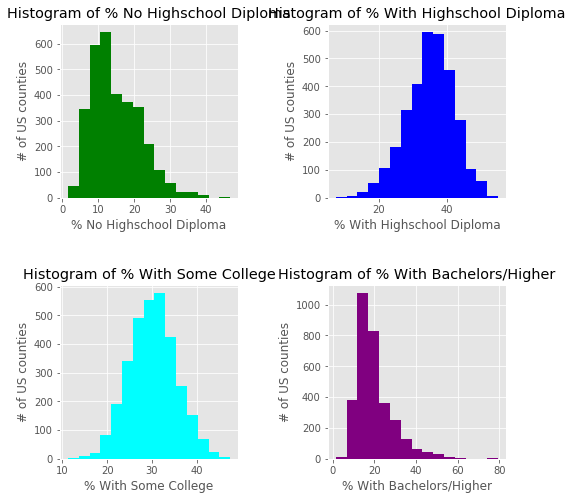

In [12]:
# Plot 2by2 histogram as a subplot: education
EDA_plot_hist_2by2(df_eda, 
              'demo__pct_adults_less_than_a_high_school_diploma', 15, '% No Highschool Diploma',
              'demo__pct_adults_with_high_school_diploma', 15, '% With Highschool Diploma',
              'demo__pct_adults_with_some_college', 15, '% With Some College',
              'demo__pct_adults_bachelors_or_higher', 15, '% With Bachelors/Higher', 100)
plt.show()

### Summary: Education Indicators ###
1. No high school diploma: showed distribution skewed to right. Majority of US counties have adults with no high school diploma less than 15%.
2. With high school diploma: showed distribution closes to normal. More than half of US counties have high school diploma greater than 30%.
3. With some college: showed distribution closes to normal. Majority of US counties have adults with some college education greater than 30%.
4. With university degree: showed distribution skewed to right. Majority of US counties have university degree less than 20%.

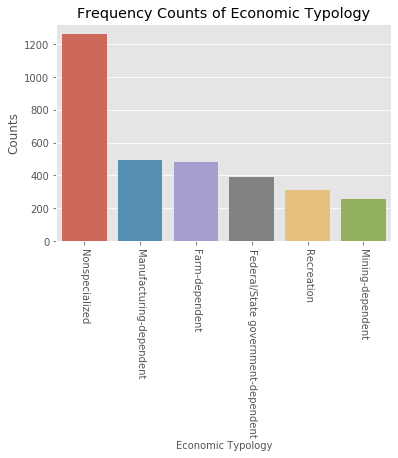

In [13]:
#---- Plot bar chart(s) ----#
# Plot bar chart: economic typology
EDA_plot_freq_chart(df_eda, 'econ__economic_typology', 'Economic Typology')
plt.show()

### Summary: Frequency Chart - Economic Typology ###
1. Non-specialized economic counties were top among the US population.
2. Mining-dependent counties were the lowest counts among the US population.

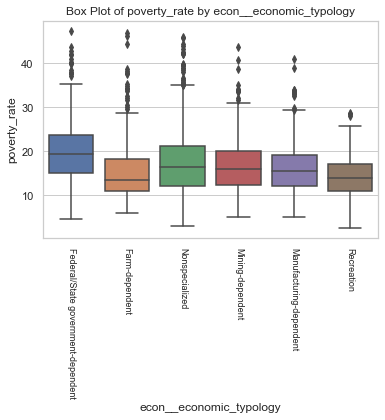

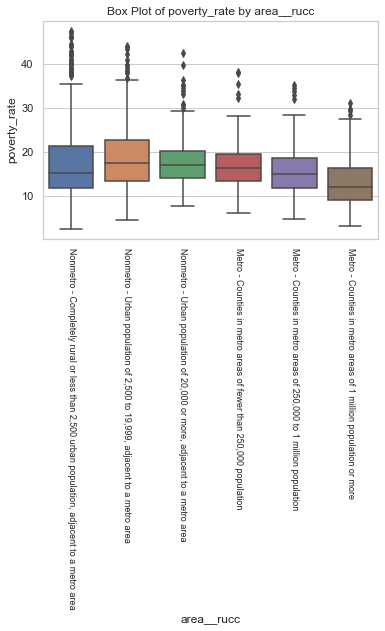

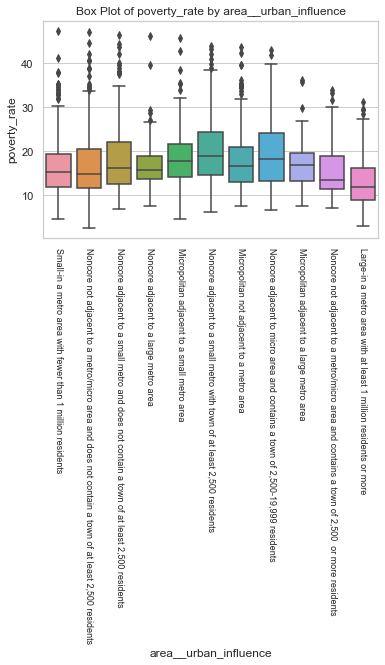

In [14]:
#---- Plot box-whisker plot chart(s) ----#
# Plot box plot: economic typology
EDA_plot_box_whisker(df_eda, 'poverty_rate', 'econ__economic_typology')
plt.show()
# Plot box plot: urban degree
EDA_plot_box_whisker(df_eda, 'poverty_rate', 'area__rucc')
plt.show()
# Plot box plot: urban size
EDA_plot_box_whisker(df_eda, 'poverty_rate', 'area__urban_influence')
plt.show()

### Summary: Box-Whisker Plots by Categorical Variables ### 
1. Economic typology: federal state-dependent counties showed the highest poverty rate (19.5%). On contrary, farming-dependent counties had the lowest poverty rate (14%).
2. Urbanization degree: with increased in population size from small micropolitan to large metropolitan counties, poverty rates were decreased.
3. Urban-rural classification: from non-metro to metro counties, the poverty rates were going down (17.5% vs. 12.5%).

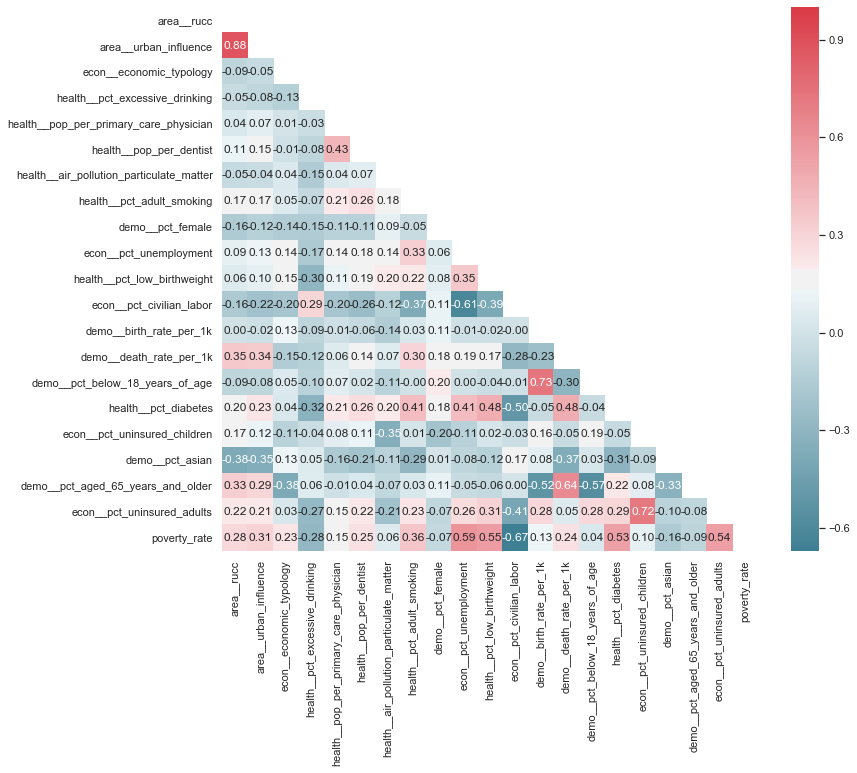

In [15]:
#---- Convert categorical variable data type from object to category ----#
df_eca_cm = df_eda.copy()
EDA_convert_object_to_cat(df_eca_cm)

#---- Encode categorical variables using avg. salary for each category to replace label ----#
for col in df_eca_cm.columns:
    if df_eca_cm[col].dtype.name == "category":
       EDA_encode_cat_var(df_eca_cm, col) 
    
#---- Plot correlation matrix chart ----#
# Define list of features and salary
features = ['area__rucc', 'area__urban_influence', 'econ__economic_typology', 
            'health__pct_excessive_drinking','health__pop_per_primary_care_physician',
            'health__pop_per_dentist','health__air_pollution_particulate_matter',
            'health__pct_adult_smoking','demo__pct_female',
            'econ__pct_unemployment','health__pct_low_birthweight',
            'econ__pct_civilian_labor','demo__birth_rate_per_1k',
            'demo__death_rate_per_1k','demo__pct_below_18_years_of_age',
            'health__pct_diabetes','econ__pct_uninsured_children',
            'demo__pct_asian','demo__pct_aged_65_years_and_older','econ__pct_uninsured_adults']

label = ['poverty_rate']    

EDA_plot_corr_matrix(df_eca_cm, features, label)
plt.show()

#health__pct_excessive_drinking  1.412846
#health__pop_per_primary_care_physician 1.419
#health__pop_per_dentist  1.486727
#health__air_pollution_particulate_matter  1.608396
#health__pct_adult_smoking  1.846427
#health__motor_vehicle_crash_deaths_per_100k  2.112717
#demo__pct_female  2.152002
#econ__pct_unemployment  2.426192
#health__pct_low_birthweight  2.524957
#econ__pct_civilian_labor  2.587305
#demo__birth_rate_per_1k  2.759288
#demo__death_rate_per_1k  2.845045
#health__pct_physical_inacticity  3.450561
#health__pct_adult_obesity  3.505667
#demo__pct_below_18_years_of_age  4.043722
#health__pct_diabetes  4.165708
#econ__pct_uninsured_children  4.323400
#demo__pct_asian  5.595170
#demo__pct_aged_65_years_and_older  5.799534
#econ__pct_uninsured_adults  5.917577

### Summary: Correlation Matrix ###
We can conclude from above that % civilian labor is the most strongly correlated with poverty rate, followed by % unemployment, % low birth weight, % diabetes and % uninsured adults.

Among the features, following trends were recongized:
1. Urban influential size and urban area concentration have a strong degree of positive correlation (0.88).
2. % below 18 year old and Birth rate per 1k have a strong degree of positive correlation (0.73).
3. % Uninsured adults and Uninsured children have a strong degree of positive correlation (0.72).

In [16]:
#---- Plot a cross-tabulate based on two categorical variables ----#    
EDA_plot_crosstab(df_eda, 'area__rucc', 'econ__economic_typology')

econ__economic_typology,Farm-dependent,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
area__rucc,,,,,,
Metro - Counties in metro areas of 1 million population or more,6,38,46,12,289,42
"Metro - Counties in metro areas of 250,000 to 1 million population",8,54,54,12,206,34
"Metro - Counties in metro areas of fewer than 250,000 population",36,60,42,22,139,22
"Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",318,78,74,70,108,74
"Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area",112,112,210,122,374,96
"Nonmetro - Urban population of 20,000 or more, adjacent to a metro area",2,48,68,16,146,42


### Summary: Cross Tabulation ###
1. With respect to non-specialized: the largest number of counties were non-specialized and non-metro with population size of 2,500 to 19,999. Followed by non-specialized and metro counties with population over 1 million.
2. With respect to farm-dependent: most of counties were dependent on farming industries in non-metro with less than 2,500 population (rural area).
3. In mid-size non-metro with population of 2,500 to 19,999, most of counties were dependent on manufacturing and mining.
4. In small size non-metro with population of 2,500 to 19,999 were mostly dependent on federal/state government funding.

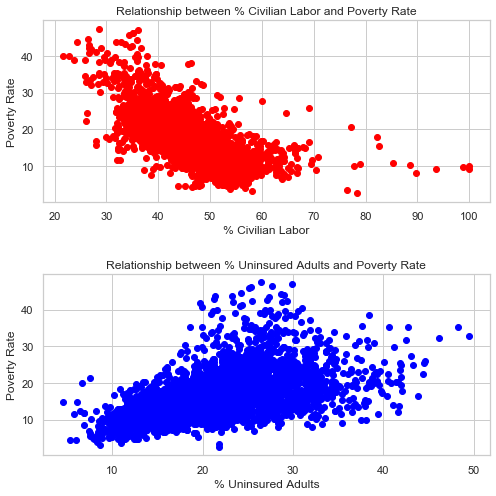

In [17]:
#---- Plot a scatter plot: numerical and categorical variables ----#
# Demographics
EDA_plot_scatter(df_eda, 
                 'econ__pct_civilian_labor', '% Civilian Labor', 'red',
                 'econ__pct_uninsured_adults', '% Uninsured Adults', 'blue', 100)
plt.show()

### Summary: Scatter Plot - economic indicators vs. poverty rate
1. % civilian labor: a strong trend of increased in labor power, decreased in poverty rate was observed.
2. % uninsured adults: a trend of increased in uninsured adults, decreased in poverty rate was observed.

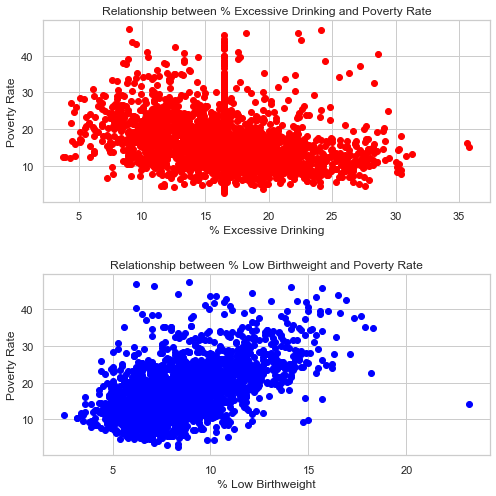

In [18]:
# Health indicators
EDA_plot_scatter(df_eda, 
                 'health__pct_excessive_drinking', '% Excessive Drinking', 'red',
                 'health__pct_low_birthweight', '% Low Birthweight', 'blue', 100)
plt.show()

### Summary: Scatter Plot - health indicators vs. poverty rate
1. % excessive drinking: higher the excessive drinking %, slight decreased in poverty rates were observed.
2. % low birthweight: higher the low birthweight %, increased in poverty rates were observed.

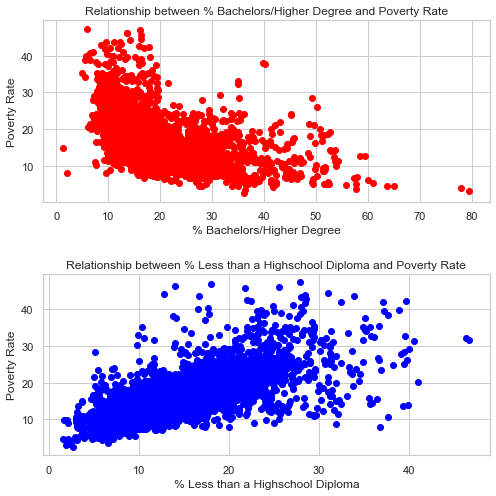

In [19]:
# Education indicators
EDA_plot_scatter(df_eda, 
                 'demo__pct_adults_bachelors_or_higher', '% Bachelors/Higher Degree', 'red',
                 'demo__pct_adults_less_than_a_high_school_diploma', '% Less than a Highschool Diploma', 'blue', 100)
plt.show()

### Summary: Scatter Plot - education indicators vs. poverty rate ###
1. % university education: increased in university degree %, lower poverty rates were observed.
2. % no high school diploma: increased in % of no high school diploma, higher poverty rates were observed.

In [20]:
#---- Plot multi-faceted scatter plots by categorical variable ----#
# convert datatype as string:
#df_eda['area__rucc'] = convert_data_type_category(df_eda, 'area__rucc')

# split dataframe by urban degree level:
#df_non_metro = split_dataframe_by_string(df_eda, 'area__rucc', 'Nonmetro')
#df_metro = split_dataframe_by_string(df_eda, 'area__rucc', 'Metro')

#EDA_plot_multi_facet_scatter(df_non_metro, df_metro, 
#                             'demo__pct_adults_less_than_a_high_school_diploma',
#                             'demo__pct_adults_bachelors_or_higher', 'poverty_rate', 100)

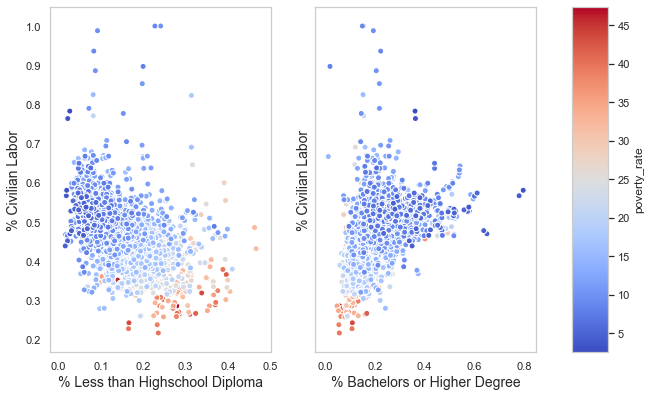

In [21]:
#---- Plot color scaled scatter plots by numerical variable ----#
EDA_plot_color_sc_scatter(df_eda, 
                          'demo__pct_adults_less_than_a_high_school_diploma', '% Less than Highschool Diploma',
                          'demo__pct_adults_bachelors_or_higher', '% Bachelors or Higher Degree', 
                          'econ__pct_civilian_labor', '% Civilian Labor',
                          'poverty_rate')
plt.show()

### Summary: Multi-faceted Scatter Plot ###
% no high school diploma vs. % university degree: these top two plots showed that higher the education level of population, increased in % of civilian labor. Thus, poverty rates were found to be lower.